<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python_Learning_Day_12_Strings%2C_Report%2C_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Menulis data siswa ke CSV dengan aplikasi & string operation
students = []
num_students = int(input("Berapa siswa yang ingin Anda masukkan? "))

for i in range(num_students):
    name = input(f"Nama siswa ke-{i+1}: ")
    score = input(f"Nilai siswa ke-{i+1}: ")
    students.append(f"{name},{score}")  # Gabungkan data dengan koma

with open("students.csv", "w") as file:
    file.write("Nama,Nilai\n")  # Header CSV
    file.write("\n".join(students))  # Tulis data siswa

print("Data siswa telah tersimpan ke students.csv")


Berapa siswa yang ingin Anda masukkan? 5
Nama siswa ke-1: udin
Nilai siswa ke-1: 7
Nama siswa ke-2: rian
Nilai siswa ke-2: 8
Nama siswa ke-3: herman
Nilai siswa ke-3: 8
Nama siswa ke-4: rudi
Nilai siswa ke-4: 8
Nama siswa ke-5: kika
Nilai siswa ke-5: 9
Data siswa telah tersimpan ke students.csv


In [10]:
# Membaca CSV dan membuat laporan sederhana
# Membaca CSV dan membuat laporan (sulit)
import csv

try:
    with open("students.csv", "r") as file:
        reader = csv.DictReader(file)
        total_score = 0
        report = []
        students_count = 0  # Hitung jumlah siswa

        for row in reader:
            students_count += 1
            name = row["Nama"]
            score = int(row["Nilai"])
            total_score += score
            status = "Lulus" if score >= 80 else "Tidak Lulus"
            report.append(f"{name} - {score} ({status})")

    average = total_score / students_count

    # Tulis laporan ke file teks
    with open("laporan.txt", "w") as report_file:
        report_file.write(f"Rata-rata kelas: {average:.2f}\n\n")
        report_file.write("\n".join(report))

    print("Laporan telah disimpan ke laporan.txt")
except FileNotFoundError:
    print("Error: Tidak menemukan file students.csv. Tolong jalankan kode 'Mudah' terlebih dahulu.")
except ZeroDivisionError:
    print("Error: Tidak ada data siswa. File students.csv kosong.")

Laporan telah disimpan ke laporan.txt


In [12]:
# Pemindah nama dengan pemrosesan string (sulit)
import os

folder = input("Masukkan folder: ")
target_sub = input("Substring yang ingin dihilangkan: ").strip()

for filename in os.listdir(folder):
    if not filename.startswith(target_sub):
        continue  # Lewati file tidak cocok

    new_name = filename[len(target_sub):]
    if not new_name:
        print(f"Warning: {filename} menjadi kosong. Dilewati.")
        continue

    old_path = os.path.join(folder, filename)
    new_path = os.path.join(folder, new_name)

    try:
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} → {new_name}")
    except Exception as e:
        print(f"Gagal mengganti nama {filename}: {str(e)}")

Masukkan folder: raw_photo1.jpg
Substring yang ingin dihilangkan: photo1.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'raw_photo1.jpg'

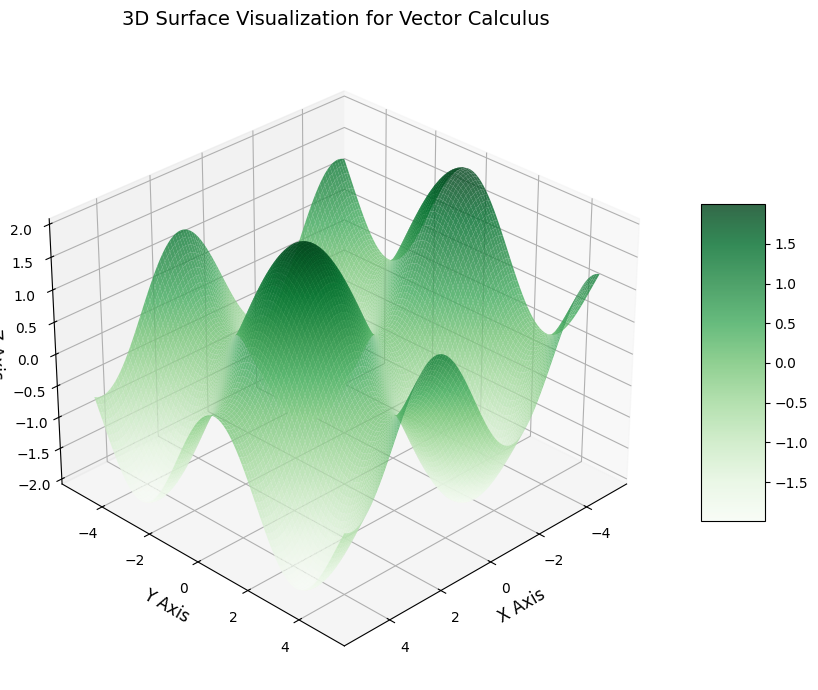

In [15]:
# visualisasi kalkulus vector dengan matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membuat data grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)  # Contoh fungsi untuk permukaan

# Membuat figure dan axis 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan 3D dengan warna hijau muda
surf = ax.plot_surface(X, Y, Z,
                      cmap='Greens',        # Skema warna hijau
                      edgecolor='none',     # Hilangkan garis tepi
                      rstride=1, cstride=1, # Resolusi permukaan
                      alpha=0.8)            # Sedikit transparan

# Menambahkan fitur visual
ax.set_xlabel('X Axis', fontsize=12)
ax.set_ylabel('Y Axis', fontsize=12)
ax.set_zlabel('Z Axis', fontsize=12)
ax.set_title('3D Surface Visualization for Vector Calculus', fontsize=14, pad=15)

# Menambahkan color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Atur sudut pandang (elevation, azimuth)
ax.view_init(30, 45)

# Tampilkan plot
plt.tight_layout()
plt.show()

Sedang menyimpan animasi... (Bisa memakan waktu 1-2 menit)


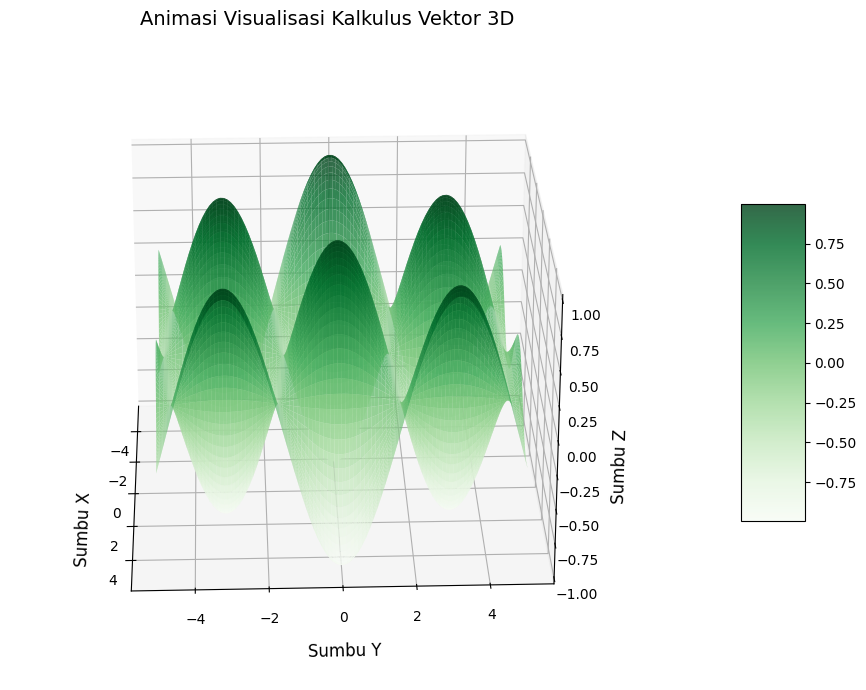

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Konfigurasi awal
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)  # Contoh fungsi permukaan

# Membuat figure dan axis 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan awal
surf = ax.plot_surface(X, Y, Z,
                      cmap='Greens',        # Warna hijau muda
                      edgecolor='none',     # Tanpa garis tepi
                      rstride=1, cstride=1, # Resolusi maksimal
                      alpha=0.8)            # Transparansi

# Konfigurasi tampilan
ax.set_xlabel('Sumbu X', fontsize=12, labelpad=10)
ax.set_ylabel('Sumbu Y', fontsize=12, labelpad=10)
ax.set_zlabel('Sumbu Z', fontsize=12, labelpad=10)
ax.set_title('Animasi Visualisasi Kalkulus Vektor 3D', fontsize=14, pad=15)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)

# Fungsi inisialisasi animasi
def init():
    return (surf,)

# Fungsi update frame animasi
def animate(angle):
    ax.view_init(elev=25, azim=angle)  # Rotasi azimuth
    return (surf,)

# Membuat animasi
ani = FuncAnimation(fig, animate,
                   frames=np.arange(0, 360, 2),  # Rotasi 360 derajat
                   init_func=init,
                   blit=True,
                   interval=50)  # 50 ms per frame

# Menyimpan animasi ke GIF
print("Sedang menyimpan animasi... (Bisa memakan waktu 1-2 menit)")
ani.save('animasi_kalkulus_vektor.gif',
         writer='pillow',
         fps=20,
         dpi=100)  # Kualitas tinggi

plt.tight_layout()
plt.show()

Sedang menyimpan GIF... (Jangan tutup program!)
GIF berhasil disimpan!


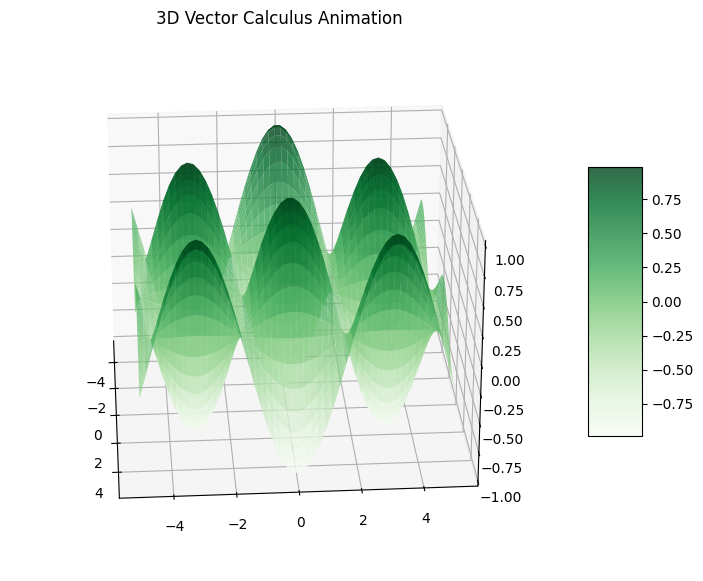

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Data grid
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# Setup plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='Greens', edgecolor='none', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('3D Vector Calculus Animation')

# Animasi
def animate(angle):
    ax.view_init(elev=25, azim=angle)
    return surf,

ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 4), interval=50, blit=True)

# Simpan sebagai GIF (pastikan direktori memiliki izin tulis)
try:
    print("Sedang menyimpan GIF... (Jangan tutup program!)")
    ani.save('animasi.gif', writer='pillow', fps=15, dpi=80)
    print("GIF berhasil disimpan!")
except Exception as e:
    print("Gagal menyimpan GIF:", str(e))

plt.show()